In [14]:
#Q1 - What is the impact of Opening Gaps - Is there any prediction pattern
import sys
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Configuration Data
NIFTY_DATA_FILTER = ''
cNIFTY50 = 'nifty50'
cNIFTYBANK = 'banknifty'
BASE_PATH = "/home/parag/devArea/pyStock"

# Importing libraries
sys.path.append(BASE_PATH+'/Libraries/')
from lib_STOCK import readStockData

BNFs, df_dates = readStockData(NIFTY_DATA_FILTER, cNIFTYBANK)

Reading Stock Data /home/parag/devArea/pyStock/Data/Consolidated/*banknifty.txt


In [23]:
#BNF['Date']=(pd.to_datetime(BNF.DateStr.astype(str) + ' ' + BNF.TimeStr.astype(str), format='%Y%m%d %H:%M'))
#BNFs = BNF.drop(['DateStr', 'TimeStr'], axis=1)
#BNFs.index = BNFs["Date"]
#BNFs = BNFs.sort_index()

In [24]:
BNFs.head()

,Open,High,Low,Close
Date,,,,
2014-10-23 18:24:00,16508.40,16508.40,16508.40,16508.40
2014-10-23 18:31:00,16508.90,16524.90,16490.95,16490.95
2014-10-23 18:32:00,16486.75,16497.15,16483.85,16489.15
2014-10-23 18:33:00,16485.05,16490.70,16485.05,16486.50
2014-10-23 18:34:00,16489.65,16493.80,16474.60,16474.60


In [26]:
BNFs.index.min() - BNFs.index.max()

Timedelta('-4078 days +17:29:00')

In [27]:
#BNFs.iloc[-90:].describe().astype(int)

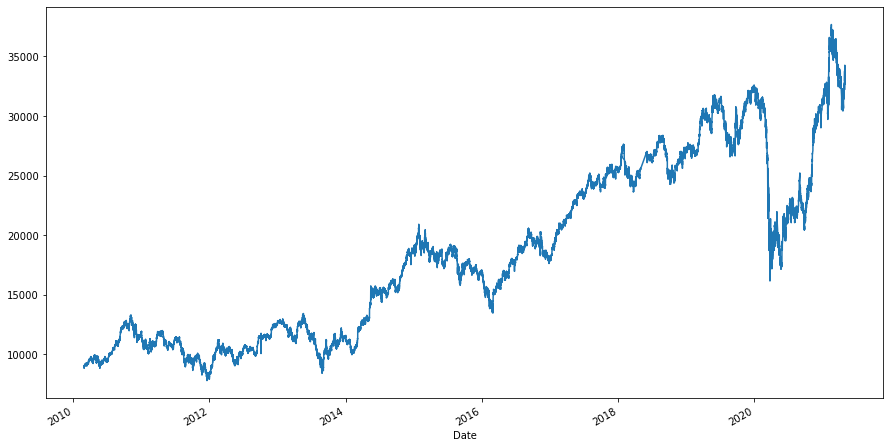

In [28]:
BNFs["Close"].plot(figsize = (15,8))
plt.show()

In [33]:
match_timestamp_eod = "15:30:00"
match_timestamp_sod = "09:16:00"
BNF_eod = BNFs.loc[BNFs.index.strftime("%H:%M:%S") == match_timestamp_eod]
BNF_sod = BNFs.loc[BNFs.index.strftime("%H:%M:%S") == match_timestamp_sod]

#BNF_sod['Price'] = BNF_sod['Open']
#BNF_eod['Price'] = BNF_eod['Close']
#print(BNF_eod)
#print(BNF_sod)
frames = [BNF_sod, BNF_eod]

BNF_DateSelection = pd.concat(frames)
BNF_DateSelection = BNF_DateSelection.sort_index()

BNF_DateSelection['dayOfWeek'] = BNF_DateSelection['Date'].dt.day_name()
BNF_DateSelection['monthOfYear'] = BNF_DateSelection['Date'].dt.month_name()
BNF_DateSelection['dayDifference'] = BNF_DateSelection['Date'].diff()
BNF_DateSelection['Gap'] =  BNF_DateSelection['Open'].sub(BNF_DateSelection['Close'].shift(1))

conditions = [
    (BNF_DateSelection['Gap'] <= -100),
    (BNF_DateSelection['Gap'] > -99) & (BNF_DateSelection['Gap'] <= 0),
    (BNF_DateSelection['Gap'] > 0) & (BNF_DateSelection['Gap'] <= 100),
    (BNF_DateSelection['Gap'] > 100)
    ]
# create a list of the values we want to assign for each condition
values = ['100minus', 'till_minus100', 'till_100', '100plus']

conditionsDir = [
    (BNF_DateSelection['Gap'] < 0),
    (BNF_DateSelection['Gap'] > 0)
    ]
# create a list of the values we want to assign for each condition
valuesDir = ['Bearish', 'Bullish']

import numpy as np

BNF_DateSelection['GapRange'] =  np.select(conditions, values)
BNF_DateSelection['GapRangeDirection'] =  np.select(conditionsDir, valuesDir)

#BNF_DateSelection['PriceDelta'] = BNF_DateSelection['Price'] - BNF_DateSelection['Price']

BNF_DateSelection = BNF_DateSelection.sort_index()
BNF_DateSelection.head()


,Open,High,Low,Close,Gap,GapRange,GapRangeDirection
Date,,,,,,,
2010-03-02 09:16:00,8893.45,8893.60,8887.65,8893.05,NaN,0,0
2010-03-02 15:30:00,8944.80,8944.95,8941.35,8943.45,51.75,till_100,Bullish
2010-03-03 09:16:00,8986.40,8987.65,8982.65,8982.65,42.95,till_100,Bullish
2010-03-03 15:30:00,9042.55,9046.40,9042.50,9044.30,59.90,till_100,Bullish
2010-03-04 09:16:00,9058.80,9062.75,9058.55,9062.75,14.50,till_100,Bullish


In [34]:
#BNF_filter["Close"].plot(figsize = (15,8))
#plt.show()

In [35]:
BNF_Gap = BNF_DateSelection.loc[BNF_DateSelection.index.strftime("%H:%M:%S") == match_timestamp_sod]
BNF_Gap.to_csv('out.csv', index=False)  
BNF_Gap.head()

,Open,High,Low,Close,Gap,GapRange,GapRangeDirection
Date,,,,,,,
2010-03-02 09:16:00,8893.45,8893.60,8887.65,8893.05,NaN,0,0
2010-03-03 09:16:00,8986.40,8987.65,8982.65,8982.65,42.95,till_100,Bullish
2010-03-04 09:16:00,9058.80,9062.75,9058.55,9062.75,14.50,till_100,Bullish
2010-03-05 09:16:00,9085.95,9092.50,9085.95,9092.50,71.50,till_100,Bullish
2010-03-08 09:16:00,9123.85,9126.75,9122.75,9124.55,88.05,till_100,Bullish


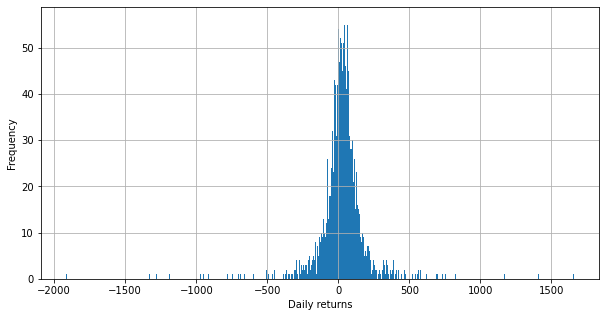

In [36]:
BNF_Gap["Gap"].hist(bins = 1000, figsize = (10,5)) 
plt.xlabel("Daily returns")
plt.ylabel("Frequency")
plt.show()#satistics
#BNF_Gap.Gap.describe()

#BNF_Gap.pivot(columns='dayOfWeek', values='Gap')

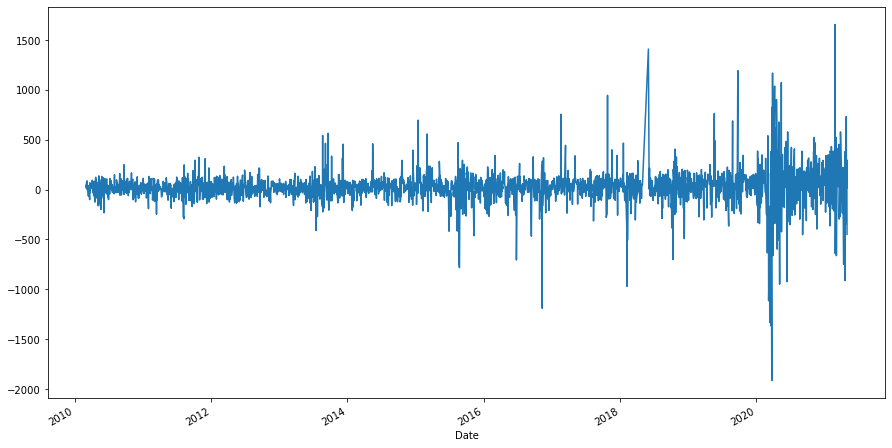

In [37]:
BNF_Gap["Gap"].plot(figsize = (15,8))
plt.show()

In [38]:
import seaborn as sns
sns.boxplot(data=BNF_Gap, x='dayOfWeek', y='Gap');

ValueError: Could not interpret input 'dayOfWeek'

In [ ]:
BNF_Gap[['dayOfWeek', 'GapRange']].groupby('dayOfWeek').count().plot(kind='bar', legend=None)

In [39]:
BNF_Gap[['GapRangeDirection', 'dayOfWeek']].groupby('GapRangeDirection').count()

KeyError: "['dayOfWeek'] not in index"

In [ ]:
BNF_Gap[['GapRange', 'Gap']].groupby('GapRange').count()

In [ ]:
Total = BNF_Gap['Gap'].sum()
print (Total)

In [21]:
BNF_Gap.groupby(["dayOfWeek"]).count().sort_values(["GapRangeDirection"], ascending=False).reset_index()

NameError: name 'BNF_Gap' is not defined